<span style="font-size: 23px;">Question 1</span>: <br>
(2 mark) Implement the counting measure in Python. Test that it satisfies additivity on the disjoint sets
{"a", "b", "c"}, {"d", "e", "f"}.
Hint: If you have never written a Python function, read https://www.w3schools.com/python/python_
functions.asp, if you have never used Python sets, read https://www.w3schools.com/python/python_
sets.asp.
Bonus mark if your implementation of the counting measure checks that the input type is correct and
raises an error otherwise. <br>
<span style="font-size: 23px;">Answer 1</span>:


In [16]:
def counting_measure(set):
    try:
        if type(set) != type({1, 2}): #creating new exception
            raise Exception(f"IncorrctInput: Please enter a set. \n{str(type(set))[8:-2].capitalize()} type is not a valid input for this operation.")
        count = len(set)
        return count
    except Exception as e: 
        return f"Following error occured: \n{e}\n"

In [17]:
myset = {1, 2, 3, 5, 6, 6, 6, 6, 6, 9, 3, 0, 33, 3, 3, 5}
mylist = [1, 3, 5, 6, 3]  #creating a list to test if my function throws an error

print("the counting measure for myset is:")
print(counting_measure(myset)) #returns the value for counting measure
print("\n")

print(counting_measure(mylist)) #will check the type of the input and return an error
print(counting_measure(1)) #will check the type of the input and return an error

the counting measure for myset is:
8


Following error occured: 
IncorrctInput: Please enter a set. 
List type is not a valid input for this operation.

Following error occured: 
IncorrctInput: Please enter a set. 
Int type is not a valid input for this operation.



In [18]:
set1 = {"a", "b", "c"}
set2 = {"d", "e", "f"}
set3 = {"a", "b", "e"} #dummy set to test if my code works properly for sets that are not disjoint

try:
    for i in set1:
        if i in set2:
            raise Exception("The given sets are not disjoint sets and hence can not be tested for the additivity rule.")
except Exception as e: 
    print(f"Following error occured: \n{e}")
else:
    if counting_measure(set1) + counting_measure(set2) == counting_measure(set1.union(set2)):
        print(f"Additivity successfully test! For two disjoint sets, set1 and set2: \ncounting_measure(set1) + counting_measure(set2) = counting_measure(set1 U set 2)")

Additivity successfully test! For two disjoint sets, set1 and set2: 
counting_measure(set1) + counting_measure(set2) = counting_measure(set1 U set 2)


<span style="font-size: 23px;">Question 2</span>: <br>
(2 marks) Create a Python class which implements intervals. Use this new data type to write a function
which implements the length measure on intervals. Test it on the interval [1, 3:5].
Hint: If you have never written a Python class, read https://www.w3schools.com/python/python_
classes.asp.
Bonus mark if your implementation of the length measure checks that the input type is correct and raises
an error otherwise. <br>
<span style="font-size: 23px;">Answer 2</span>:


In [19]:
class Interval():
    
    def __init__(self, interval):
        try:
            if type(interval) != type([1, 2]):
                raise Exception(f"IncorrectInput: Please enter the interval in a valid format! \nFor your refrence, enter it as so: [a, b]\na: the point where your interval starts\nb: the point where your interval ends")
            if len(interval) != 2:
                raise Exception(f"IncorrectInput: Please enter a valid interval! \nThe interval will only have two inputs: [a, b] \na: the starting point \nb: the ending point \nyou entered {len(interval)} inputs")
            if interval[0] > interval[1]:
                raise Exception(f"IncorrectOrder: Please enter the interval in the right format! For your refrence: [a, b] \na will always be smaller than b as it is the starting point")
        except Exception as e:
            print(f"Following error occured: \n{e}\n")
        else:
            self.a = interval[0]
            self.b = interval[1]

In [20]:
interval1 = Interval([1, 3.5])
interval2 = Interval({1, 3.5}) #this will throw an error as the input type is incorrect

Following error occured: 
IncorrectInput: Please enter the interval in a valid format! 
For your refrence, enter it as so: [a, b]
a: the point where your interval starts
b: the point where your interval ends



In [21]:
def interval_len(interval): 
    try:
        if type(interval) != type(Interval([1, 3])):
            raise Exception(f"IncorrectInput: This function only takes an interval as an input! \nYou entered: {str(type(interval))[8:-2].capitalize()}")
    except Exception as e: 
        return f"Following error occured: \n{e}\n"
    else:
        length = interval.b - interval.a
        return length

In [22]:
print(f"the length of given interval is:")
print(interval_len(interval1)) 
print("\n")
print(interval_len({1, 3.5})) #this will check if the input of type interval that i created and throw an error
print(interval_len(1)) #this will check if the input of type interval that i created and throw an error

the length of given interval is:
2.5


Following error occured: 
IncorrectInput: This function only takes an interval as an input! 
You entered: Set

Following error occured: 
IncorrectInput: This function only takes an interval as an input! 
You entered: Int



<span style="font-size: 23px;">Question 3</span>: <br>
(3 marks) Import scipy.stats in order to access the scipy.stats.expon distribution. This implements
the exponential distribution Exp($\lambda$). Make sure you read the documentation https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html to understand how it works and how
the parameter $\lambda$ is encoded. Using the cdf method of scipy.stats.expon define a function called
expon_measure which will take as input an interval (defined in the previous question) and will return
its probability mass under the probability measure Exp (2) (i.e. $\lambda$ = 2). Test your function by computing
the probability measure of the following intervals: <br>
(a) [0; 1] <br>
(b) [1; 1] <br>
(c) [1; 10] <br>
(d) [0;1) <br>
Plot the pdf of Exp (2) on comment on whether your answers seem to make sense visually. <br>
<span style="font-size: 23px;">Answer 3</span>:


In [23]:
# !pip install scipy #installing scipy

In [24]:
#importing all the necessary libraries

from scipy.stats import expon
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [25]:
def expon_measure(interval): 
    try:
        if type(interval) != type(Interval([1, 3])): #random interval to test the type of input
            raise Exception(f"IncorrectInput: This function only takes an interval as an input! \nYou entered: {str(type(interval))[8:-2].capitalize()}")
        pass 
    except Exception as e:
        return f"Following error occured: \n{e}\n"
    else:
        prob = expon.cdf(x = interval.b, loc = 0, scale = 1/2) - expon.cdf(x = interval.a, loc = 0, scale = 1/2) #calulating probability mass
        return prob

In [26]:
interval_1 = Interval([0, 1])
interval_2 = Interval([1, 1])
interval_3 = Interval([1, 10])
interval_4 = Interval([0, float('inf')])

In [27]:
interval_list = [interval_1, interval_2, interval_3, interval_4]   #simplifying the code for my ease and to make the output look more presentable
for num, i in enumerate(interval_list):
    print(f"{num+1}) the probability density for exponential distribution with mean = 2 or rate parameter = 0.5 in the area between x = {i.a} and x = {i.b} is:")
    print(expon_measure(i))
    print("\n")

1) the probability density for exponential distribution with mean = 2 or rate parameter = 0.5 in the area between x = 0 and x = 1 is:
0.8646647167633873


2) the probability density for exponential distribution with mean = 2 or rate parameter = 0.5 in the area between x = 1 and x = 1 is:
0.0


3) the probability density for exponential distribution with mean = 2 or rate parameter = 0.5 in the area between x = 1 and x = 10 is:
0.13533528117545912


4) the probability density for exponential distribution with mean = 2 or rate parameter = 0.5 in the area between x = 0 and x = inf is:
1.0




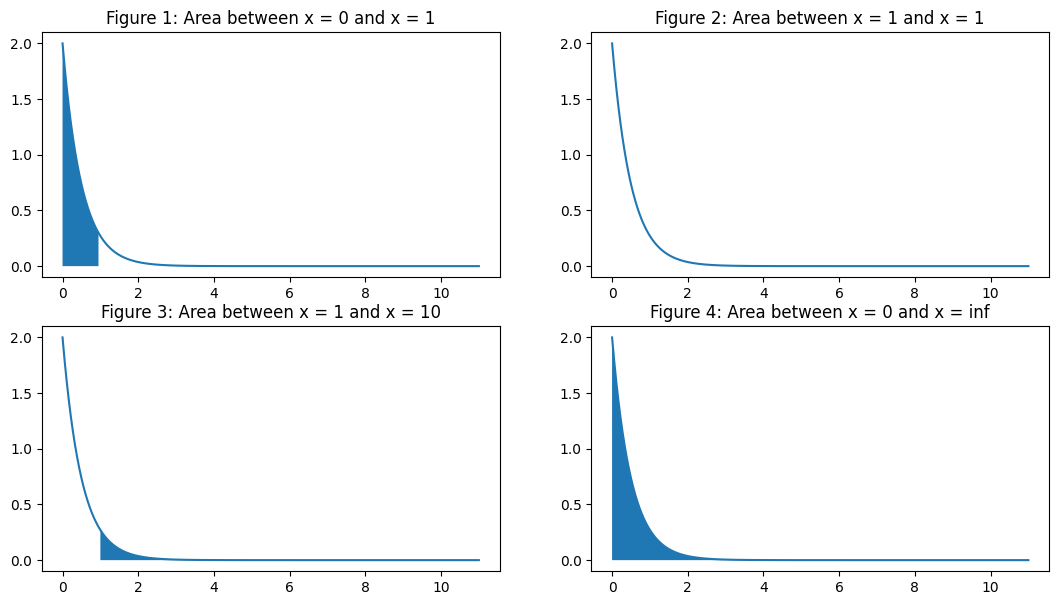

In [28]:
#plotting the above densities on the pdf of exponential distribution
var = np.linspace(0, 11, 10000)
fig, ax = plt.subplots(2, 2, figsize = (13, 7))

ax[0, 0].plot(var, expon.pdf(var, loc = 0, scale = 1/2)) #plotting the area between x = 0 and x = 1 to justify the density output
area1 = np.arange(0, 1, 1/20)
ax[0, 0].fill_between(area1, expon.pdf(area1, loc = 0, scale = 1/2))
ax[0, 0].title.set_text("Figure 1: Area between x = 0 and x = 1")

ax[0, 1].plot(var, expon.pdf(var, loc = 0, scale = 1/2)) #plotting the area between x = 1 and x = 1 to justify the density output
area2 = np.arange(1, 1, 1/20)
ax[0, 1].fill_between(area2, expon.pdf(area2, loc = 0, scale = 1/2))
ax[0, 1].title.set_text("Figure 2: Area between x = 1 and x = 1")

ax[1, 0].plot(var, expon.pdf(var, loc = 0, scale = 1/2)) #plotting the area between x = 1 and x = 10 to justify the density output
area3 = np.arange(1, 10, 1/20)
ax[1, 0].fill_between(area3, expon.pdf(area3, loc = 0, scale = 1/2))
ax[1, 0].title.set_text("Figure 3: Area between x = 1 and x = 10")

ax[1, 1].plot(var, expon.pdf(var, loc = 0, scale = 1/2)) #plotting the area between x = 0 and x = inf to justify the density output
area4 = np.arange(0, 5, 1/20)
ax[1, 1].fill_between(area4, expon.pdf(area4, loc = 0, scale = 1/2))    
ax[1, 1].title.set_text("Figure 4: Area between x = 0 and x = inf")

plt.show()

The plots I see for pdf of our exponential distribution alligns with our density outputs. The graphs above show that since the mean of this exponential distribution is 2, there's a high chance of the event occuring before 2 unit time and therefore the area between 0 and 2 takes up most of the space. <br>

1\) The chances of the event happening between 0 unit time and 1 unit time came out to be 0.86466 and it can be validated from the figure 1. We can intuitively say that the area of the highlighted region is indeed approximately 86% of the total. <br>

2\) The chances of the event happening between 1 unit time and 1 unit time came out to be 0 and it can be validated from the figure 2. We can intuitively say that the area of the highlighted region is indeed 0% of the total. <br>

3\) The chances of the event happening between 1 unit time and 10 unit time came out to be 0.13534 and it can be validated from the figure 3. We can intuitively say that the area of the highlighted region is indeed approximately 14% of the total. <br>

4\) The chances of the event happening between 0 unit time and infinity unit time came out to be 1 and it can be validated from the figure 4. We can intuitively say that the area of the highlighted region is indeed 100% of the total. <br>

<span style="font-size: 23px;">Question 4</span>: <br>
(3 marks) Using the pdf method of scipy.stats.expon, define a function called expon_pdf which will
take one argument x and return the pdf of the probability measure Exp (2) evaluated at x. Import
the integration routine quad from scipy.integrate, and read the documentation https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html to see how it works. Use quad to
compute and print the given integrals. <br>
<span style="font-size: 23px;">Answer 4</span>:

In [29]:
expon_pdf = lambda x: expon.pdf(x, loc = 0, scale = 1/2) #function that will return the pdf of an exponential distribution with mean = 2 and rate parameter = 0.5 for any given x

In [30]:
for num, i in enumerate(interval_list): #simplifying the code for my ease and to make the output look more presentable
    print(f"{num+1}) the probability density for exponential distribution with mean = 2 or rate parameter = 0.5 in the area between x = {i.a} and x = {i.b} is:")
    print(quad(expon_pdf, i.a, i.b)[0])
    print("\n")

1) the probability density for exponential distribution with mean = 2 or rate parameter = 0.5 in the area between x = 0 and x = 1 is:
0.8646647167633872


2) the probability density for exponential distribution with mean = 2 or rate parameter = 0.5 in the area between x = 1 and x = 1 is:
0.0


3) the probability density for exponential distribution with mean = 2 or rate parameter = 0.5 in the area between x = 1 and x = 10 is:
0.13533528117545912


4) the probability density for exponential distribution with mean = 2 or rate parameter = 0.5 in the area between x = 0 and x = inf is:
1.0




To answer the question if I notice anything, the answers from the previous question and the answers from this question are the same essentially because cumulative density function is nothing but the intergral of the pdf of a distribution starting from negative infinity, which in the case of exponential distribution is 0 or zero, up to the given point. In question 3, we found the difference between the cdf of two numbers to arrive at the density in the given area. In question 4, we directly calculated the integral of the pdf in the given region and that's the reason why the answers in question 3 and question 4 are exactly the same. They are just two differnt approaches of calculating the given area. 

To make it simple:

cdf(b) - cdf(a) == density of the area between x = a and x = b <br>

and <br>

density of the area between x = a and x = b == $\int_{a}^{b} pdf dx$

NOTE: The last answer is 0.99999999999, that is, it tends to 1 as there no denfinite point that marks the end of the distibution.


In [1]:
print("Just checking how git commit works.")

Just checking how git commit works.
